# Wordle

## Solving method

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from collections import defaultdict
import ipywidgets as widgets
from ipywidgets import interactive_output, fixed
from IPython.display import Image

In [3]:
with open('./data/processed/wordle-answers-alphabetical.txt', 'r') as file:
    possible_answers = file.read().splitlines() 
   
with open('./data/processed/wordle-allowed-guesses.txt', 'r') as file:
    words_allowed_guesses = file.read().splitlines() 
words_allowed_guesses = words_allowed_guesses + possible_answers

print("Number of possible answer words:", len(possible_answers))
print("Number of accepted guess words:", len(words_allowed_guesses))

Number of possible answer words: 2315
Number of accepted guess words: 12972


In [4]:
letters = [letter for letter in "azertyuiopqsdfghjklmwxcvbn"]
letter_imgs = {letter: mpimg.imread(f"letters/{letter}.png") for letter in letters}

def display_word(word):
    if word == "": return
    letters = [letter_imgs[letter] for letter in word]
    plt.figure()
    plt.imshow(np.concatenate(letters, axis=1))
    plt.axis('off')
    plt.show()

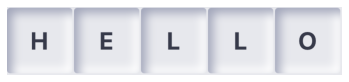

In [5]:
display_word("hello")

In [6]:
def compare_words(query_word, answer_word):
    res = []
    pos_not_found = []
    letters_not_found = []
    for (i, letter1), letter2 in zip(enumerate(query_word), answer_word):
        if letter1 == letter2:
            res.append('2')
        else:
            res.append('0')
            pos_not_found.append(i)
            letters_not_found.append(letter2)
    for i in pos_not_found:
        if query_word[i] in letters_not_found:
            res[i] = "1"
            letters_not_found.remove(query_word[i])
    return "".join(res)

In [7]:
compare_words("raise", "gorge")

'10002'

In [8]:
compare_words("crane","crane")

'22222'

In [9]:
def filter_words(possible_words, word, comparison_string):
    new_possible_words = []
    for w in possible_words:
        if compare_words(word, w) == comparison_string:
            new_possible_words.append(w)
    return new_possible_words

In [10]:
print(filter_words(possible_answers, "raise", "10002"))

['borne', 'broke', 'brute', 'chore', 'creme', 'crepe', 'crone', 'crude', 'curve', 'drone', 'drove', 'erode', 'force', 'forge', 'forte', 'froze', 'genre', 'gorge', 'grope', 'grove', 'horde', 'merge', 'nerve', 'ombre', 'probe', 'prone', 'prove', 'prude', 'prune', 'puree', 'purge', 'there', 'three', 'trope', 'trove', 'truce', 'verge', 'verve', 'where', 'wrote']


$ score(word) = \sum_{letter  \in  word}\frac{1}{rank(letter)} $

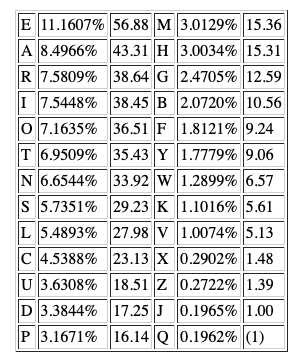

In [11]:
Image('data/processed/higfreq.png')

In [12]:
letters_by_frequency = "eariotnslcudpmhgbfywkvxzjq"
letters_scores = {letter: 1/(i+1) for i, letter in enumerate(letters_by_frequency)}
    
def score_RelativeFreq_ofWord(word):
    score = 0
    for letter in set(word):
        score += letters_scores[letter]
    return score

In [13]:
print("raise:", score_RelativeFreq_ofWord("raise"))
print("bumpy:", score_RelativeFreq_ofWord("bumpy"))

raise: 2.208333333333333
bumpy: 0.3507158476198724


In [14]:
def solver_RelativeFrequency_method(comparison_string, word, possible_words):
    possible_words = filter_words(possible_words, word, comparison_string)
    if len(possible_words) == 0:
        print("No possible word in vocabulary.")
        return "", []
    else:
        words_sorted = sorted(possible_words, key=score_RelativeFreq_ofWord, reverse=True)
        word = words_sorted[0]
        return word, possible_words

In [15]:
best_20_starting_words=["roate","raise","raile","soare","arise","irate","orate","ariel","arose","raine","artel","taler","ratel","aesir","arles","realo","alter","saner","later","snare"]


## Evalutating solutions

In [16]:
def test_solution(answer_word, solver_method_type, starting_word="tares"):
    word = starting_word
    possible_words = possible_answers
    attempts = 1
    while attempts < 20:
        if word == answer_word:
            return attempts
        attempts += 1
        comparison_string = compare_words(word, answer_word)
        word, possible_words = solver_method_type(comparison_string, word, possible_words)
    return attempts

def evaluate_solver(possible_words, solver_method_type, starting_word="mount"):
    solves = []
    for word in tqdm(possible_answers):
        solves.append((word, test_solution(word, solver_method_type, starting_word=starting_word)))
    mean_attempts = sum([solve[1] for solve in solves])/len(solves)
    print(f"Mean number of attempts: {mean_attempts} accross {len(solves)} games") 
    failed = [solve[0] for solve in solves if solve[1] > 6]
    print(f"Failed words (more than 6 attempts): {len(failed)}")
    print(", ".join(failed))

In [17]:
evaluate_solver(possible_answers, solver_RelativeFrequency_method, starting_word="raise")

  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8168466522678184 accross 2315 games
Failed words (more than 6 attempts): 28
awash, bezel, boxer, brave, brook, daddy, ferry, found, foyer, frown, fully, hatch, hunch, jaunt, joker, jolly, kitty, level, mammy, poppy, shave, swash, swore, taste, waver, weave, willy, wound


In [18]:
for word in best_20_starting_words:
    print("Starting word:- ",word)
    evaluate_solver(possible_answers,solver_RelativeFrequency_method,starting_word=word)
    print("----------------------------------------------------------")

Starting word:-  roate


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8323974082073433 accross 2315 games
Failed words (more than 6 attempts): 36
boxer, brave, catch, crack, dried, eager, fatty, ferry, fever, filly, found, foyer, frown, gazer, graze, hatch, hitch, jaunt, joker, jolly, kitty, krill, lapel, parer, shave, swear, taste, tatty, taunt, tract, wafer, watch, waver, weave, willy, wound
----------------------------------------------------------
Starting word:-  raise


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8168466522678184 accross 2315 games
Failed words (more than 6 attempts): 28
awash, bezel, boxer, brave, brook, daddy, ferry, found, foyer, frown, fully, hatch, hunch, jaunt, joker, jolly, kitty, level, mammy, poppy, shave, swash, swore, taste, waver, weave, willy, wound
----------------------------------------------------------
Starting word:-  raile


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.819870410367171 accross 2315 games
Failed words (more than 6 attempts): 40
blaze, booby, boxer, brake, brave, ferry, finer, fixer, flake, flame, flank, folly, found, frank, frown, froze, fully, graze, hatch, hazel, jaunt, joker, jolly, kitty, lowly, mammy, parer, share, shave, swore, taste, wafer, waste, waver, weave, willy, wooly, woozy, wound, wreak
----------------------------------------------------------
Starting word:-  soare


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8876889848812093 accross 2315 games
Failed words (more than 6 attempts): 43
amaze, bezel, boxer, brake, brave, catch, corer, eager, eater, evade, fever, found, foyer, freak, fully, gazer, graze, hatch, hover, jaunt, joker, jolly, lapel, level, rarer, river, rover, rower, sassy, shark, shave, swore, taste, tatty, taunt, wafer, waste, watch, waver, weave, willy, wound, wreak
----------------------------------------------------------
Starting word:-  arise


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8263498920086394 accross 2315 games
Failed words (more than 6 attempts): 32
bezel, boxer, brook, daddy, ferry, fixer, found, foyer, fully, hatch, hunch, jaunt, joker, jolly, kitty, level, mammy, poppy, rarer, roger, rover, rower, shark, shave, swash, swore, taste, waste, waver, weave, willy, wound
----------------------------------------------------------
Starting word:-  irate


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8211663066954644 accross 2315 games
Failed words (more than 6 attempts): 34
awash, boxer, brake, brave, crazy, crook, daddy, fatty, ferry, found, foyer, fully, gazer, graze, hatch, hitch, hunch, jaunt, joker, jolly, kitty, lapel, mammy, ninny, racer, rarer, rover, rower, swash, taste, tatty, waver, willy, wound
----------------------------------------------------------
Starting word:-  orate


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8449244060475163 accross 2315 games
Failed words (more than 6 attempts): 38
boxer, brake, brave, catch, crack, crook, eager, fatty, ferry, filly, found, foyer, gazer, graze, hatch, hitch, jaunt, joker, jolly, kitty, lapel, parer, racer, rarer, rover, rower, shave, swear, taste, tatty, taunt, tract, wafer, watch, waver, weave, willy, wound
----------------------------------------------------------
Starting word:-  ariel


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8341252699784016 accross 2315 games
Failed words (more than 6 attempts): 39
billy, booby, boxer, brake, brave, corer, crook, ferry, fixer, flank, found, foyer, fully, graze, hatch, hover, jaunt, joker, jolly, kitty, mover, parer, rarer, riper, river, rover, rower, shave, taste, tatty, taunt, verve, wafer, waste, waver, weave, willy, woozy, wound
----------------------------------------------------------
Starting word:-  arose


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8730021598272137 accross 2315 games
Failed words (more than 6 attempts): 32
bezel, booby, boxer, brake, brave, catch, fever, fixer, found, foyer, fully, graze, hatch, jaunt, joker, jolly, level, rarer, roger, rover, rower, shark, shave, swarm, swore, taste, tatty, taunt, waste, waver, willy, wound
----------------------------------------------------------
Starting word:-  raine


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8181425485961125 accross 2315 games
Failed words (more than 6 attempts): 29
boney, bound, boxer, brake, brave, crack, eager, finer, fixer, found, foyer, frill, frown, gazer, graze, hatch, hunch, joker, jolly, kinky, kitty, lapel, taste, taunt, tight, waver, willy, wound, wreak
----------------------------------------------------------
Starting word:-  artel


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.7792656587473004 accross 2315 games
Failed words (more than 6 attempts): 21
boxer, brake, brave, catch, crack, crook, ferry, folly, found, fully, graze, jaunt, jolly, rarer, sever, shave, taste, taunt, waste, waver, wound
----------------------------------------------------------
Starting word:-  taler


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8138228941684664 accross 2315 games
Failed words (more than 6 attempts): 27
brake, brave, catch, crack, crook, ferry, fever, fixer, folly, found, frown, fully, graze, jaunt, joker, jolly, rarer, riper, river, roger, rover, rower, vaunt, waver, weave, wooer, wound
----------------------------------------------------------
Starting word:-  ratel


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.796544276457883 accross 2315 games
Failed words (more than 6 attempts): 19
boxer, brake, brave, catch, crack, ferry, folly, found, frown, fully, graze, jaunt, jolly, sever, taste, taunt, waver, weave, wound
----------------------------------------------------------
Starting word:-  aesir


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8742980561555074 accross 2315 games
Failed words (more than 6 attempts): 39
boxer, brave, brook, daddy, found, foyer, freed, frown, froze, fully, hatch, hover, hunch, jaunt, joker, jolly, kitty, krill, mammy, mower, ninny, poker, poppy, rarer, river, rover, rower, shark, shave, swarm, swash, swore, taste, tight, waver, wight, willy, wound, wreak
----------------------------------------------------------
Starting word:-  arles


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8496760259179266 accross 2315 games
Failed words (more than 6 attempts): 25
bezel, boxer, brake, brave, catch, flake, found, fully, graze, jaunt, jolly, kitty, rarer, roger, rover, sever, share, shave, swore, taste, taunt, waver, weave, willy, wound
----------------------------------------------------------
Starting word:-  realo


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8803455723542117 accross 2315 games
Failed words (more than 6 attempts): 43
blaze, bound, boxer, brake, brave, catch, creme, crook, daddy, dried, finer, fixer, folly, found, foyer, froze, grave, graze, hatch, hazel, hitch, jaunt, joker, jolly, kitty, label, lapel, lowly, mammy, parer, swear, swine, swore, taste, tatty, taunt, wafer, waste, waver, willy, wooly, wound, wreak
----------------------------------------------------------
Starting word:-  alter


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8159827213822894 accross 2315 games
Failed words (more than 6 attempts): 29
brake, brave, catch, crook, ferry, fever, fixer, folly, found, frown, fully, graze, jaunt, joker, jolly, rarer, riper, river, roger, rover, rower, shave, taste, taunt, waste, waver, wooer, wound, wreak
----------------------------------------------------------
Starting word:-  saner


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8345572354211663 accross 2315 games
Failed words (more than 6 attempts): 31
amaze, bezel, boxer, brave, catch, ferry, fever, foyer, frown, fully, graze, hatch, hunch, jaunt, jolly, level, nanny, rarer, refer, riper, river, roger, rover, sever, shave, taste, tatty, taunt, waver, willy, wound
----------------------------------------------------------
Starting word:-  later


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.812095032397408 accross 2315 games
Failed words (more than 6 attempts): 28
brake, brave, catch, crack, crook, ferry, fever, fixer, folly, found, frown, fully, graze, jaunt, joker, jolly, rarer, riper, river, roger, rover, rower, taste, taunt, waver, weave, wooer, wound
----------------------------------------------------------
Starting word:-  snare


  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.840172786177106 accross 2315 games
Failed words (more than 6 attempts): 34
boxer, brave, brown, catch, eager, eater, found, foyer, frown, fully, gazer, graze, harry, hatch, hunch, jaunt, joker, jolly, rarer, relax, roger, rover, rower, sassy, shave, taste, tatty, taunt, wafer, waste, waver, willy, wound, wreak
----------------------------------------------------------


In [19]:
evaluate_solver(possible_answers, solver_RelativeFrequency_method, starting_word="tares")

  0%|          | 0/2315 [00:00<?, ?it/s]

Mean number of attempts: 3.8220302375809934 accross 2315 games
Failed words (more than 6 attempts): 24
boxer, catch, crack, eagle, ferry, found, freed, frown, hatch, jaunt, jolly, kitty, krill, nanny, rearm, roger, rover, sever, shave, waver, weave, wight, willy, wound


In [22]:
test_solution("alone",solver_RelativeFrequency_method,starting_word="crane")

3

In [23]:
test_solution("audio",solver_RelativeFrequency_method,starting_word="plane")

3